In [6]:
import pandas as pd

df = pd.read_csv("../../Data/UNILAG.csv")
print(df.shape)
print(df.info())
print(df.head())
print(df.describe())
print(df["Admission_Status"].value_counts())
print(df.groupby("Faculty")["Aggregate"].mean())


(10000, 8)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 8 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Faculty           10000 non-null  object 
 1   Department        10000 non-null  object 
 2   UTME_Score        10000 non-null  int64  
 3   Olevel_Grades     10000 non-null  object 
 4   Post_UTME_Score   10000 non-null  int64  
 5   Aggregate         10000 non-null  float64
 6   Cutoff            10000 non-null  float64
 7   Admission_Status  10000 non-null  object 
dtypes: float64(2), int64(2), object(4)
memory usage: 625.1+ KB
None
                  Faculty                         Department  UTME_Score  \
0                     Law                                Law         365   
1                    Arts                            Russian         206   
2  Basic Medical Sciences         Medical Laboratory Science         201   
3             Engineering  Civil & Envi

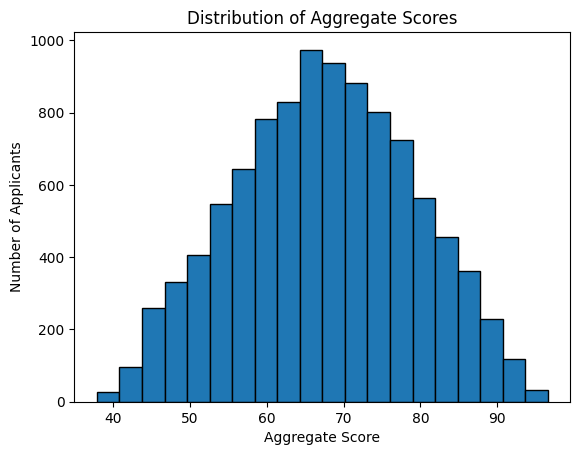

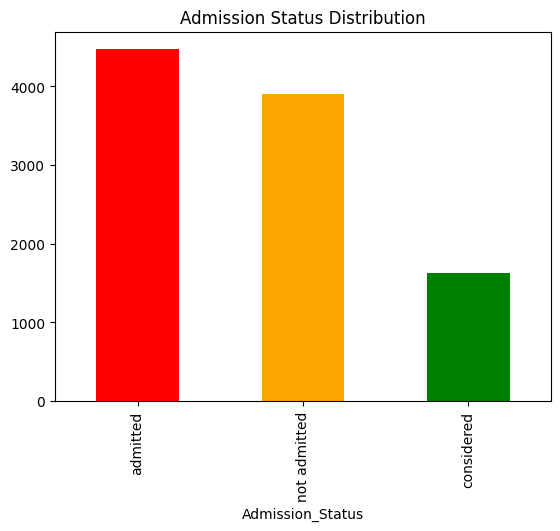

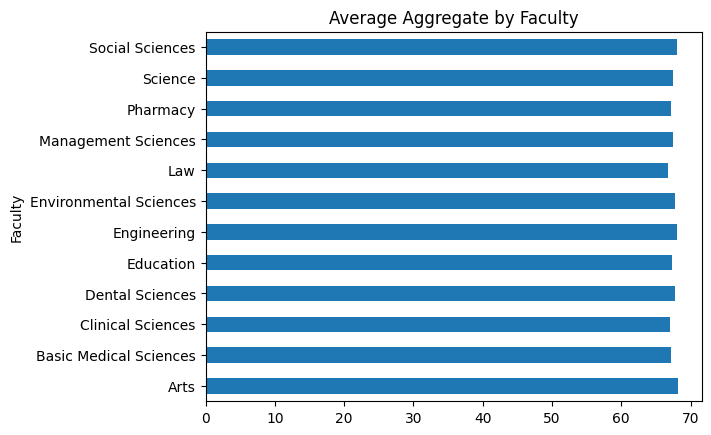

Faculty
Engineering               0.618340
Science                   0.612978
Environmental Sciences    0.608059
Education                 0.607101
Arts                      0.522356
Social Sciences           0.514934
Management Sciences       0.421729
Law                       0.416883
Basic Medical Sciences    0.309609
Clinical Sciences         0.253468
Pharmacy                  0.241297
Dental Sciences           0.216646
dtype: float64
Department
Education Christian Religious Studies    0.972222
Education French                         0.969697
Civil & Environmental Engineering        0.965517
Systems Engineering                      0.956044
Geophysics                               0.955882
                                           ...   
Medical Laboratory Science               0.293907
Accounting                               0.263889
Pharmacy                                 0.244898
Dentistry                                0.216646
Medicine and Surgery                     0.084

In [7]:
import matplotlib.pyplot as plt

# Histogram of aggregates
plt.hist(df["Aggregate"], bins=20, edgecolor="black")
plt.xlabel("Aggregate Score")
plt.ylabel("Number of Applicants")
plt.title("Distribution of Aggregate Scores")
plt.show()

# Admission status counts
df["Admission_Status"].value_counts().plot(kind="bar", color=["red","orange","green"])
plt.title("Admission Status Distribution")
plt.show()

# Average aggregate by faculty
df.groupby("Faculty")["Aggregate"].mean().plot(kind="barh")
plt.title("Average Aggregate by Faculty")
plt.show()

# Admission rate per faculty
admission_rate = df[df["Admission_Status"]=="admitted"].groupby("Faculty").size() / df.groupby("Faculty").size()
print(admission_rate.sort_values(ascending=False))

df["meets_cutoff"] = df["Aggregate"] >= df["Cutoff"]
print(df.groupby("Department")["meets_cutoff"].mean().sort_values(ascending=False))
